<a href="https://colab.research.google.com/github/andrejobuljen/ML_projects/blob/main/scikit-learn/sklearn_random_forest_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [73]:
# this is how to load MNIST from google colab sample_data folder (very useful):
mnist = pd.read_csv("./sample_data/mnist_test.csv")
mnist_img_size = (28,28)

labels = mnist.iloc[:,0]
images = mnist.iloc[:,1:]

# otherwise try
# mnist = fetch_openml('mnist_784')

In [77]:
print(mnist.info())
print(mnist.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 785 entries, 7 to 0.667
dtypes: int64(785)
memory usage: 59.9 MB
None
   7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.661  0.662  0.663  0.664  0.665  0.666  0.667  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


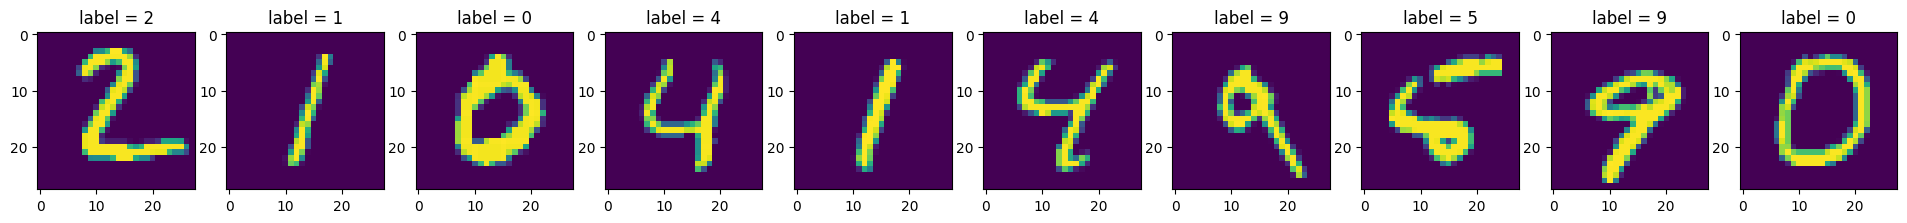

((9999,), (9999, 784))

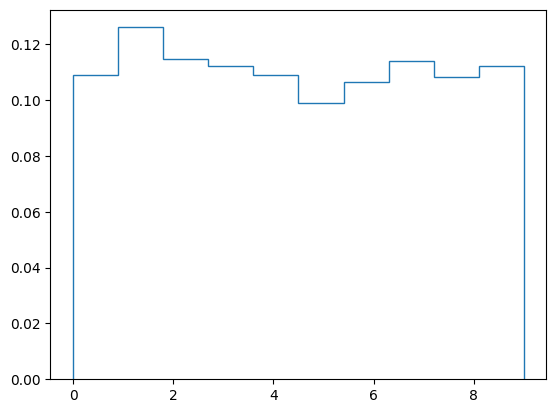

In [101]:
fig, ax = subplots(1, 10, figsize=(24,4))
for i, axi in enumerate(ax):
  axi.imshow(images.values[i].reshape(mnist_img_size))
  axi.set_title('label = %i'%labels.values[i])
show()

hist(labels.values, density=True, histtype='step')
labels.values.shape, images.values.shape

In [115]:
# Split the dataset into train and test using sklearn

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)

# Initialize RF classifier
randomforest = RandomForestClassifier(n_estimators=200)

# Fit
randomforest.fit(X_train, y_train)

# Predict
pred = randomforest.predict(X_test)

# Print accuracy, classification report and confusion matrix:
print ('Accuracy is %.2f%%'%(100*(pred == y_test).sum()/len(y_test)) )
print ('Classification report: \n', classification_report(y_test, pred))
print ('Confusion matrix: \n', confusion_matrix(y_test, pred))

Accuracy is 95.35%
Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       214
           1       0.98      0.99      0.98       228
           2       0.92      0.95      0.94       198
           3       0.94      0.93      0.93       192
           4       0.97      0.96      0.97       193
           5       0.98      0.93      0.96       183
           6       0.97      0.98      0.97       177
           7       0.96      0.94      0.95       227
           8       0.95      0.91      0.93       195
           9       0.92      0.95      0.93       193

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

Confusion matrix: 
 [[210   0   0   0   0   0   3   0   1   0]
 [  0 225   1   0   0   0   1   0   1   0]
 [  3   0 189   0   1   0   0   3   2   0]
 [  0   0   4 178   0   2   1   3   2   2]
 [  1

## Visualize predictions and true labels

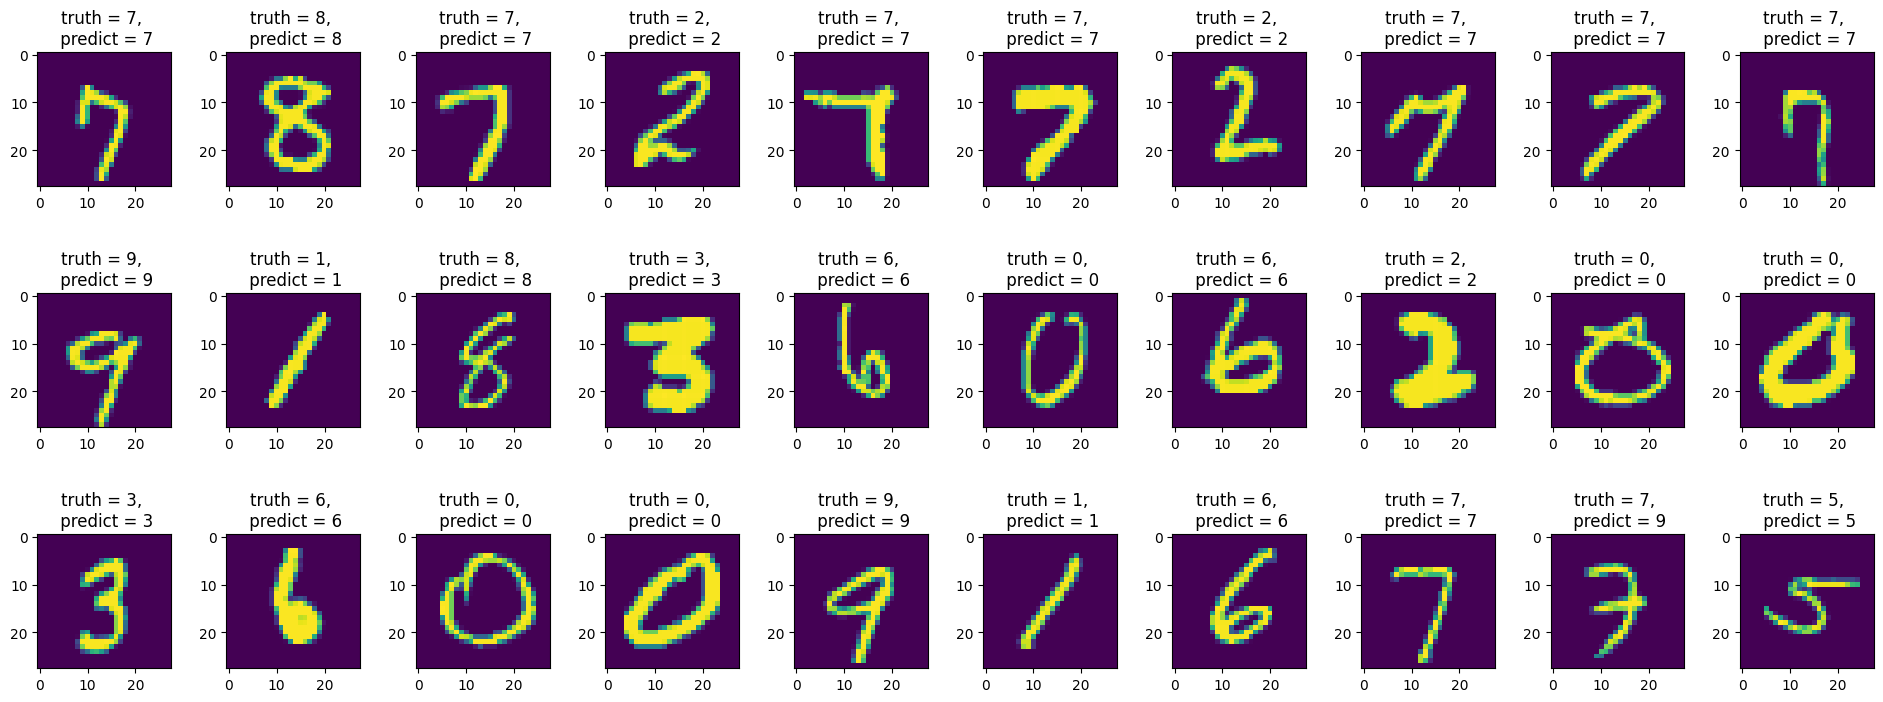

In [97]:
fig, ax = plt.subplots(3, 10, figsize=(24,8))
ax = ax.flatten()
for i, axi in enumerate(ax):
  axi.imshow(X_test.values[i].reshape(mnist_img_size))
  axi.set_title('truth = %i, \n predict = %i'%(y_test.values[i], pred[i]))
plt.subplots_adjust(hspace=0.8)

## Visualize wrong predictions

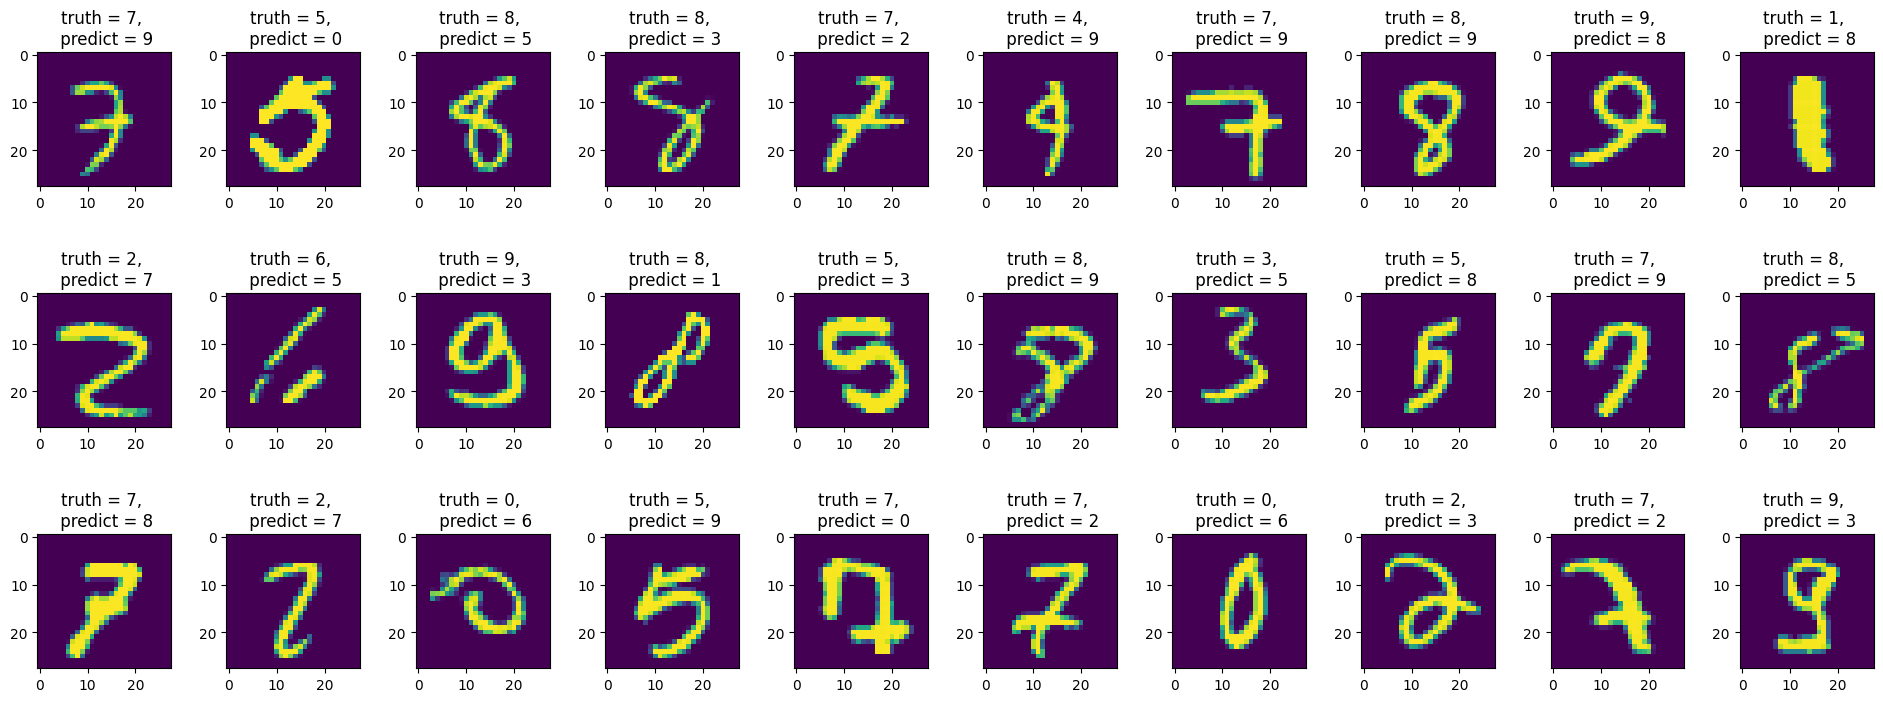

In [98]:
fig, ax = plt.subplots(3, 10, figsize=(24,8))
ax = ax.flatten()

fail_indexes = np.where(pred != y_test)[0][:len(ax)]

for i in range(len(ax)):
  ax[i].imshow(X_test.values[fail_indexes[i]].reshape(mnist_img_size))
  ax[i].set_title('truth = %i, \n predict = %i'%(y_test.values[fail_indexes[i]], pred[fail_indexes[i]]))
plt.subplots_adjust(hspace=0.8)